In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import jetset
# from jetset.data_loader import Data
# from jetset.data_loader import ObsData
# from jetset.test_data_helper import  test_SEDs
# from jetset.plot_sedfit import PlotSED

#Programa para ajustar curvas de emision de rayos x y gamma de galaxias AGN starbust

In [ ]:
class sed:

    def __init__(self, name, filename, z = 1.0, daterange = [0, 70000]):
        self.filename = filename
        self.name = name
        self.data = pd.read_csv(filename, names = ['freq', 'bin', 'Nufnu', 'error', 'ti', 'tf'] , comment='#', delim_whitespace=True)
        self.z = z
        
        if daterange == [0, 70000] :
            daterange[0] = np.min(self.data['ti'])
            daterange[1] = np.max(self.data['ti'])
            
        self.daterange = [daterange[0], daterange[1]]
    
    def seealldata(self):
        plt.scatter(self.data['freq'][(self.data['freq'] < 1e20 )], self.data['Nufnu'][(self.data['freq'] < 1e20 )], color = 'b', label='Soft X Rays')
        plt.scatter(self.data['freq'][(self.data['freq'] > 1e20 )], self.data['Nufnu'][(self.data['freq'] > 1e20 )], color = 'r', label='Gamma Rays')
        plt.yscale('log')
        plt.xscale('log')
        plt.title('All Data')
        plt.legend()
        plt.show()
        
    def seedates(self, daterange = [0, 70000]):
        if daterange == [0, 70000] :
            daterange = self.daterange
        
        condx = (self.data['freq'] < 1e20) & ( self.data['ti'] > daterange[0] ) &  ( self.data['ti'] < daterange[1] )
        condg = (self.data['freq'] > 1e20) & ( self.data['ti'] > daterange[0] ) &  ( self.data['ti'] < daterange[1] )
        
        plt.hist(self.data['ti'][condx], bins = 10, color = 'b')
        plt.hist(self.data['ti'][condg], bins = 10, alpha = 0.5, color = 'r')
        plt.show()
        
        self.daterange  = daterange
    
    def cleandata(self):
        daterange = self.daterange
        
        condx = (self.data['freq'] < 1e20) & ( self.data['ti'] > daterange[0] ) &  ( self.data['ti'] < daterange[1] )
        condg = (self.data['freq'] > 1e20) & ( self.data['ti'] > daterange[0] ) &  ( self.data['ti'] < daterange[1] )
        
        plt.scatter(self.data['freq'][condx], self.data['Nufnu'][condx], color = 'b', label='Soft X Rays')
        plt.scatter(self.data['freq'][condg], self.data['Nufnu'][condg], color = 'r', label='Gamma Rays')
        plt.yscale('log')
        plt.xscale('log')
        plt.title('Data Clean')
        plt.legend()
        plt.show()

        self.dataclean = pd.concat([self.data[condx], self.data[condg]])
        
    def datatotable(self):
        
        d = self.dataclean
        data = Data(n_rows = d.shape[0])
        data.set_field('x', np.log10(d['freq']))
        data.set_field('y', np.log10(d['Nufnu']))
        data.set_field('dy', np.log10(d['error']))
        data.set_field('T_start', d['ti'])
        data.set_field('T_stop', d['tf'])
        
        data.set_meta_data('z', self.z)
        data.set_meta_data('obj_name', self.name)
        data.set_meta_data('restframe','obs')
        data.set_meta_data('data_scale','log-log')
        
        self.fdata = data
        self.datased()
        
    def datased(self):
        data_table = self.fdata
        self.sed_data = ObsData( data_table = data_table )
        #sed_data.table
        #sed_data.metadata

    def activity_cleandata(self):
        daterange = self.daterange
        
        condx = (self.data['freq'] < 1e20) & ( self.data['ti'] > daterange[0] ) &  ( self.data['ti'] < daterange[1] )
        condg = (self.data['freq'] > 1e20) & ( self.data['ti'] > daterange[0] ) &  ( self.data['ti'] < daterange[1] )
        
        plt.scatter(self.data['freq'][condx], self.data['Nufnu'][condx], color = 'b', label='Choosen X-rays')
        plt.scatter(self.data['freq'][condg], self.data['Nufnu'][condg], color = 'r', label=r'Choosen TeV $\gamma$-rays')
        plt.scatter(self.data['freq'][(self.data['freq'] < 1e20 )], self.data['Nufnu'][(self.data['freq'] < 1e20 )], 
                    color = 'b', s=10, label='Total X-ray data', alpha = 0.1)
        plt.scatter(self.data['freq'][(self.data['freq'] > 1e20 )], self.data['Nufnu'][(self.data['freq'] > 1e20 )],
                    color = 'r', s=10, label=r'Total TeV $\gamma$-ray data', alpha = 0.1)
        plt.yscale('log')
        plt.xscale('log')
        plt.title('Data Clean')
        plt.legend()
        plt.show()        

    def modelsed(self, a = 1.0, b = 2 ,c = 3,):

        my_jet.set_par('z_cosm', val = self.z)  ### [4-6] e15
        B

        my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
        my_jet.eval()
        my_jet.spectral_components.build_table(restframe='obs')
        self.t_obs = my_jet.spectral_components.table

    def printmodelplusdata(self):
      realdata = self.sed_data
      #modeldata = self.t_obs
      modeldata = np.loadtxt('test_SED_prueba.txt')
      
      ######Agregado de Josue
      #datos = pd.read_csv("test_SED_prueba.txt", sep="\t")   
      #MKR421 = np.genfromtxt('MRK421.txt', comments='#', delimiter='', usecols = (0,1,2,3,4,5))  #DAtos
      #MKR421= pd.DataFrame(MKR421, columns=['nu', 'bin', 'nufnu', 'nufnu_e', 'TStart', 'TStop']) #DAtos a pandas para mejor manejo
      
      #Grafica del modelo
      fig, ax2 = plt.subplots(constrained_layout = True,figsize=(9,5)) 
      ax2.loglog(datos['#nu'], datos[['Sum','Sync','SSC']]) 
      ax2.set_ylabel('log(vF) [erg cm-2 s-1]') 
      ax2.set_xlabel('log(nu) [Hz]') 
      ax2.set_title('log(E) [eV]')
      plt.ylim(pow(10,-18.5),10e-14)
      plt.xlim(10e+8,10e27)
      

      #Grafica de los datos.
      #Este archivo es mejor llamarlo desde la funcion que limpia los datos
      #ya que estan los diferentes tiempos de observacion
      fig, ax = plt.subplots(constrained_layout = True,figsize=(9,5)) 
      ax.loglog(MKR421['nu'], MKR421[['nufnu']]) 
      ax.set_ylabel('log(vF) [erg cm-2 s-1]') 
      ax.set_xlabel('log(nu) [Hz]') 
      ax.set_title('log(E) [eV]')
      plt.ylim(pow(10,-15),10e-10)
      plt.xlim(10e+8,10e27)

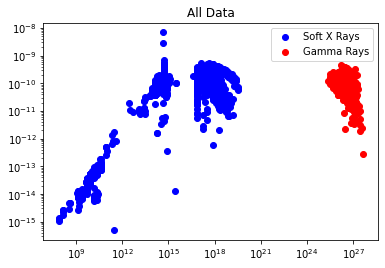

In [ ]:
MRK421 = sed(name = 'MRK421', filename='MRK421.txt', z = 0.0308)
MRK421.seealldata()

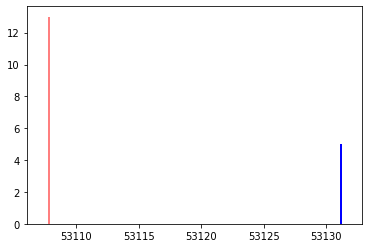

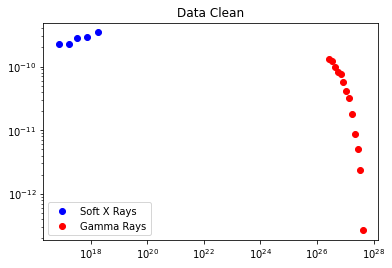

In [ ]:
MRK421.seedates([53000,53300])
MRK421.cleandata()

In [ ]:
MRK421.datatotable()
MRK421.sed_data
sed_data = MRK421.sed_data

NameError: ignored